In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import Aer,QuantumCircuit,transpile,assemble,IBMQ
from qiskit.visualization import plot_histogram

In [2]:
n = 4
sec = '1110'


In [3]:
ber_vaz = QuantumCircuit(n+1, n)
ber_vaz.h(n)
ber_vaz.z(n)


for q in range(n):
    ber_vaz.h(q)

ber_vaz.barrier()

sec = sec[::-1]
for q in range(n):
    if sec[q]=='0':
        ber_vaz.i(q)
    else:
        ber_vaz.cx(q,n)
ber_vaz.barrier()
for q in range(n):
    ber_vaz.h(q)
for q in range(n):
    ber_vaz.measure(q,q)

ber_vaz.draw()

┌───┐      ░ ┌───┐           ░ ┌───┐┌─┐         
q_0: ┤ H ├──────░─┤ I ├───────────░─┤ H ├┤M├─────────
     ├───┤      ░ └───┘           ░ ├───┤└╥┘┌─┐      
q_1: ┤ H ├──────░───■─────────────░─┤ H ├─╫─┤M├──────
     ├───┤      ░   │             ░ ├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├──────░───┼────■────────░─┤ H ├─╫──╫─┤M├───
     ├───┤      ░   │    │        ░ ├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░───┼────┼────■───░─┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║  ║ └╥┘
q_4: ┤ H ├┤ Z ├─░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░       ║  ║  ║  ║ 
c: 4/═════════════════════════════════════╩══╩══╩══╩═
                                          0  1  2  3

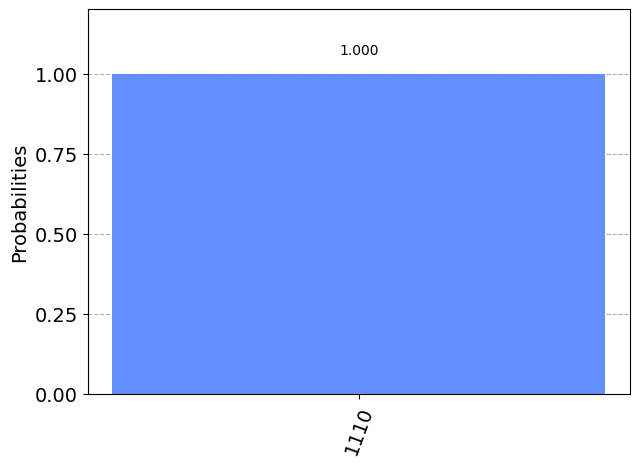

In [4]:
aer_sim = Aer.get_backend('aer_simulator')
qoj = assemble(ber_vaz)
results = aer_sim.run(qoj).result()
result = results.get_counts()
plot_histogram(result)